## Exploratory Data Analysis for Loan Prediction Dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Importing Dataset
data=pd.read_csv('Train_Data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Basic Informations about Dataset

In [3]:
data.shape

(614, 13)

In [4]:
# Checking for null values, Yes we've null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Dropping "Loan_ID" column
data=data.drop(['Loan_ID'],axis=1)
df=data.copy()

In [7]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df['Loan_Status']=np.where(df['Loan_Status']=='Y',1,0)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Text(0.5, 1.0, 'Loan_status based on gender')

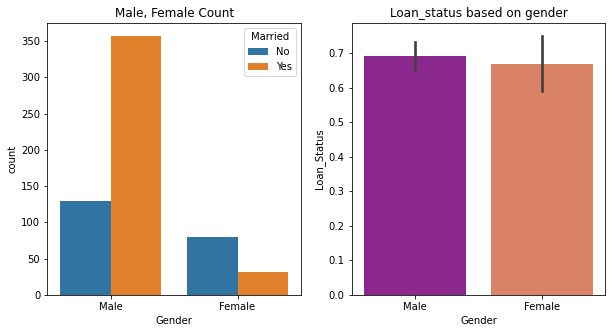

In [9]:
# gender and loan_status
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Gender', data=df,hue='Married')
plt.title('Male, Female Count')
plt.subplot(1,2,2)
sns.barplot(x='Gender', y='Loan_Status', data=df,palette='plasma')
plt.title('Loan_status based on gender')

### Inference: from the above,
- While comparing with Female, Male took most of the loans
- Male who was married took more loan than unmarried
- At the same time, in Female who is unmarried took more loans than married
- Loan is getting approved for both Male and Female

In [10]:
# married, unmarried
df['Married']=np.where(df['Married']=='Yes',1,0)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Text(0.5, 1.0, 'Loan_status for married and unmarried')

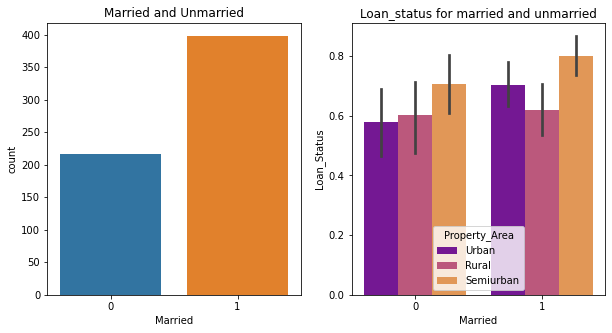

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Married', data=df)
plt.title('Married and Unmarried')
plt.subplot(1,2,2)
sns.barplot(x='Married', y='Loan_Status', data=df,palette='plasma', hue='Property_Area')
plt.title('Loan_status for married and unmarried')

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

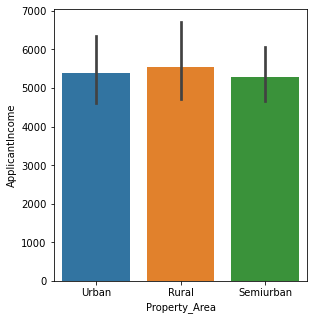

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='Property_Area',y='ApplicantIncome',data=df)

### inference: from the above,
1) from the first figure,
- Most of the loan was taken by Married people
- More loans were taken by people who were from 'semi urban' Property_Area

2) from second figure,
- In Rural area, applicant income is High and In Semiurban area, applicant income is low

3) Here, we can see a Relationship:
- Semiurban area have the low level income, so that they took more number of Loans

Text(0.5, 1.0, 'Loan_Status based on self employment')

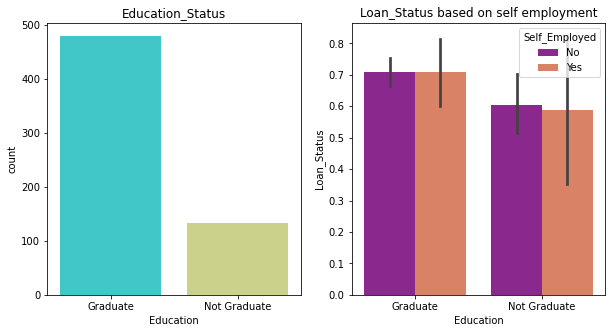

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Education',data=df,palette='rainbow')
plt.title('Education_Status')
plt.subplot(1,2,2)
sns.barplot(x='Education',y='Loan_Status',hue='Self_Employed',data=df,palette='plasma')
plt.title('Loan_Status based on self employment')

### inference:
- Most of the Graduate people took loans than Not_Graduate people
- Half of the Graduate prople are Self Employed and half of the Graduate prople are Not Self Employed

<AxesSubplot:>

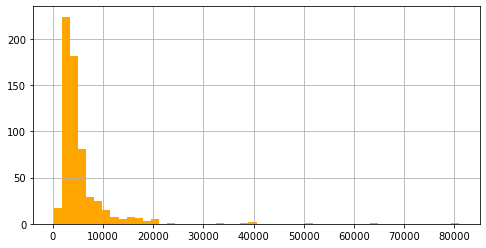

In [14]:
#applicant income
plt.figure(figsize=(8,4))
df['ApplicantIncome'].hist(bins=50,color='orange')

### inference:
- Lots of applicant's income lies between 0 to 20000

<Figure size 720x288 with 0 Axes>

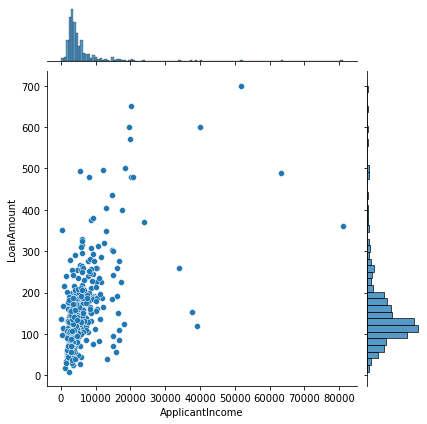

In [15]:
# relation between Applicant Income & Loan amount
plt.figure(figsize=(10,4))
sns.jointplot(x='ApplicantIncome',y='LoanAmount',data=df)

### inference:
- Depending on the Applicant income, Loan amount is getting increased
- More number of loan amount lies between 0 to 300

## Splitting Numerical and Categorical Features

In [16]:
# numerical features
numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [17]:
# discrete and continuous features
discrete=[feature for feature in df.columns if len(df[feature].unique())<25 and feature in numerical_features]
continuous=[feature for feature in df.columns if feature not in discrete and feature in numerical_features]

In [18]:
print(discrete)
print(continuous)

['Loan_Amount_Term', 'Credit_History']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [19]:
# categorical features
categorical_features=[feature for feature in df.columns if feature not in numerical_features]
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

### Distribution of Numerical features

In [20]:
def data_distribution(df,feature):
    plt.figure(figsize=(8,4))
    df[feature].hist(bins=50)
    plt.title(feature)
    plt.show()

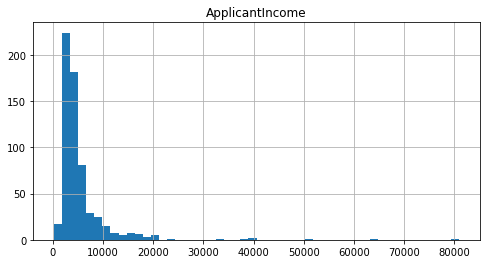

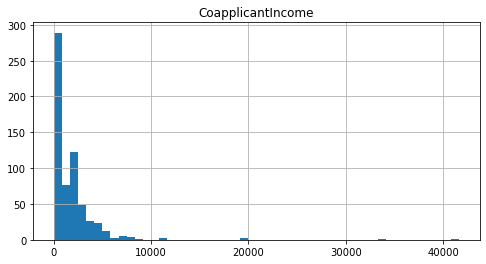

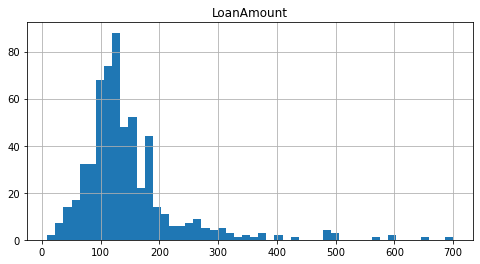

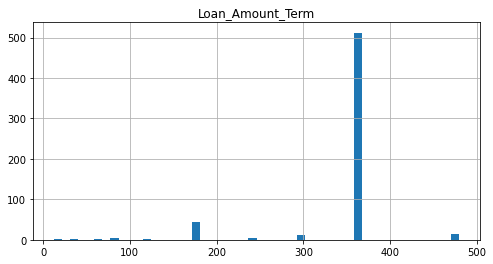

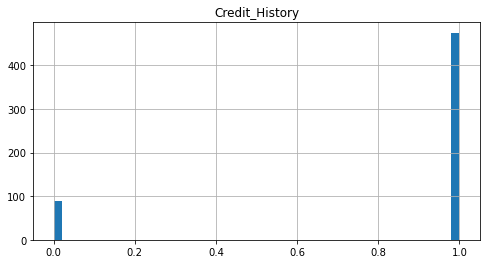

In [21]:
for feat in numerical_features:
    data_distribution(df,feat)

### Outliers

In [22]:
# Outliers
def for_outliers(df,feature):
    plt.figure(figsize=(10,5))
    sns.boxplot(x=feature,data=df,palette='plasma')
    plt.title(feature)
    plt.show()

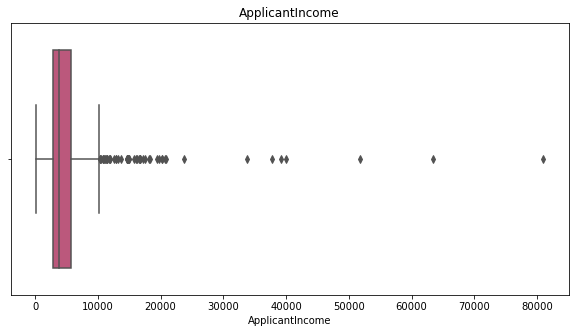

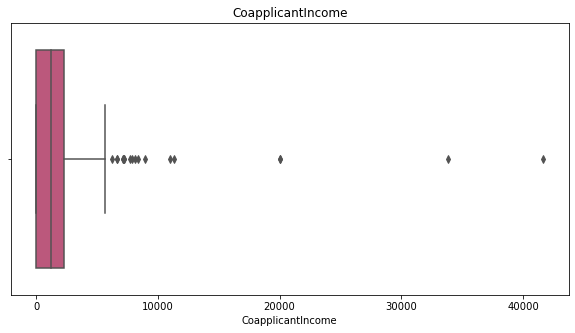

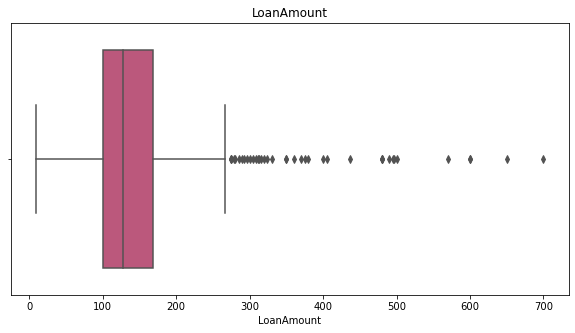

In [23]:
for outlier_feature in continuous:
    for_outliers(df,outlier_feature)

### Correlation

<AxesSubplot:>

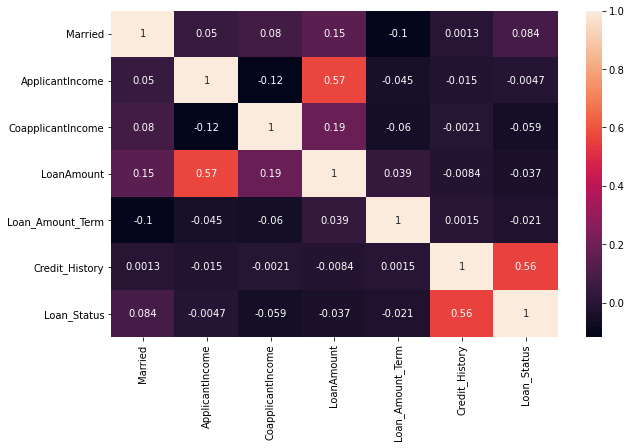

In [24]:
correlation = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

### inference:
- Applicant Income and Loan Amount are correlated 57%
- Credit history and Loan Staqtus are correlated 56%